# Predicting Iris Species

References:
+ https://archive.ics.uci.edu/ml/datasets/iris
+ https://en.wikipedia.org/wiki/Iris_flower_data_set
+ https://scikit-learn.org/stable/modules/tree.html
+ https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
+ https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
+ https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn


## 1. Load Iris dataset

+ Download iris.csv on Canvas (also available at https://archive.ics.uci.edu/ml/datasets/iris), and save it to your ISA414 folder on M drive. Open the file and check the data.
+ The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). So 150 in total. Download an 
+ Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 
+ Goal: Develop a decision tree classifier based on the combination of these four features

In [1]:
import pandas as pd

# load data
iris = pd.read_csv("iris.csv")

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# select predictors
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# alternative: df = iris.loc[:,'sepal_length':'petal_width']

In [4]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X.shape

(150, 4)

In [6]:
# select the target
y=iris[['species']]
#alternative: y=iris.loc[:,'species']

y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


## 2. Build a Decision Tree classifier

In [7]:
# import the library
from sklearn.tree import DecisionTreeClassifier

# initialize the algorithm
dtree=DecisionTreeClassifier()

# train a model 
dtree.fit(X,y)

DecisionTreeClassifier()

## 3. Use the model to predict new data

In [9]:
new_data = pd.DataFrame(columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], data=[[5.1,3.5,1.4,0.2]])

dtree.predict(new_data)

array(['setosa'], dtype=object)

In [10]:
dtree.predict_proba(new_data)

array([[1., 0., 0.]])

## 4. Data Splitting and Model Selection

In [14]:
# load the required library
from sklearn.model_selection import train_test_split

# split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [15]:
# initialize the algorithm
dtree=DecisionTreeClassifier()

# Generate a new model using training data only
dtree.fit(X_train,y_train)

# predict the test data
y_pred = dtree.predict(X_test)

In [16]:
# load the required libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(dtree.feature_importances_)

0.9555555555555556
[[14  0  0]
 [ 0 16  1]
 [ 0  1 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        17
   virginica       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[0.02144608 0.02144608 0.5709656  0.38614224]


### Output the decision tree

[Text(133.92000000000002, 195.696, 'petal_length <= 2.6\ngini = 0.666\nsamples = 105\nvalue = [36, 33, 36]\nclass = setosa'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(167.40000000000003, 152.208, 'petal_width <= 1.65\ngini = 0.499\nsamples = 69\nvalue = [0, 33, 36]\nclass = virginica'),
 Text(66.96000000000001, 108.72, 'petal_length <= 5.0\ngini = 0.157\nsamples = 35\nvalue = [0, 32, 3]\nclass = versicolor'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = versicolor'),
 Text(100.44000000000001, 65.232, 'sepal_length <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(267.84000000000003, 108.72, 'petal_length <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0

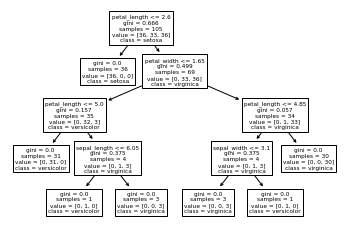

In [17]:
from sklearn import tree

tree.plot_tree(dtree, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], \
               class_names=['setosa', 'versicolor', 'virginica'])

### Tuning the parameters

In [18]:
# initialize the algorithm
dtree_d2=DecisionTreeClassifier(max_depth=3)

# Generate a new model using training data only
dtree_d2.fit(X_train,y_train)

# predict the test data
y_pred = dtree_d2.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(dtree_d2.feature_importances_)

0.9555555555555556
[[14  0  0]
 [ 0 16  1]
 [ 0  1 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        17
   virginica       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[0.        0.        0.0661294 0.9338706]


[Text(125.55000000000001, 190.26, 'petal_width <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [36, 33, 36]\nclass = setosa'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(167.4, 135.9, 'petal_width <= 1.65\ngini = 0.499\nsamples = 69\nvalue = [0, 33, 36]\nclass = virginica'),
 Text(83.7, 81.53999999999999, 'petal_length <= 5.0\ngini = 0.157\nsamples = 35\nvalue = [0, 32, 3]\nclass = versicolor'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = versicolor'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(251.10000000000002, 81.53999999999999, 'petal_length <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]\nclass = virginica'),
 Text(209.25, 27.180000000000007, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]\nclass = virginica')]

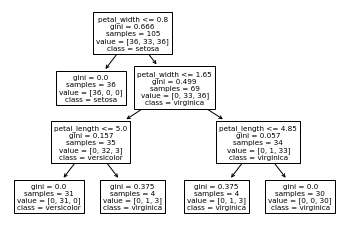

In [20]:
tree.plot_tree(dtree_d2, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], \
               class_names=['setosa', 'versicolor', 'virginica'])